In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('seaborn')

In [56]:
ch = pd.read_csv('california-housing-data (1).csv')
ch = ch.dropna()

In [57]:
#Removing outliers:
ch = ch[ch['median_house_value'] < 500000]
ch[ch['ocean_proximity'] == 'ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27,1675,521.0,744,331,2.1579,450000,ISLAND
8315,-118.33,33.34,52,2359,591.0,1100,431,2.8333,414700,ISLAND
8316,-118.32,33.33,52,2127,512.0,733,288,3.3906,300000,ISLAND
8317,-118.32,33.34,52,996,264.0,341,160,2.7361,450000,ISLAND
8318,-118.48,33.43,29,716,214.0,422,173,2.6042,287500,ISLAND


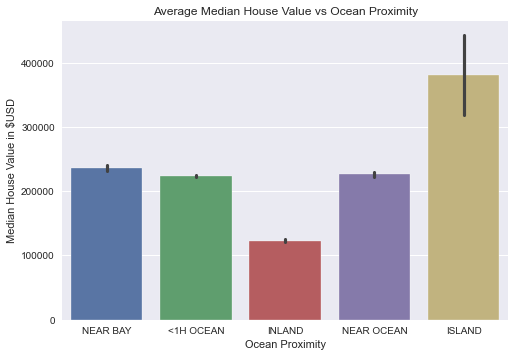

In [58]:
ax = sns.barplot(data=ch, x="ocean_proximity", y="median_house_value")
plt.title('Average Median House Value vs Ocean Proximity');
ax.set(xlabel='Ocean Proximity', ylabel='Median House Value in $USD')
plt.show()

### Data Cleaning


In [59]:
#Count how many homes live on an island in this sample
ch.ocean_proximity.str.count("ISLAND").sum()

5

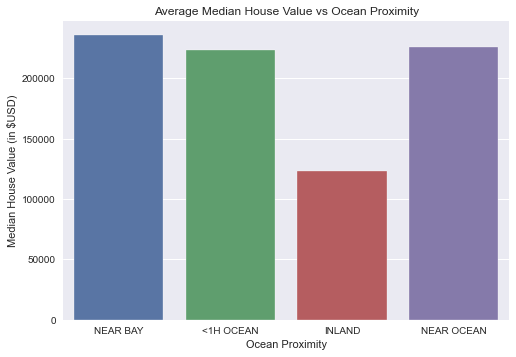

In [60]:
#Removal of the island data

ch = ch.replace(to_replace ="ISLAND",
                 value = np.nan)
ax = sns.barplot(data=ch, x="ocean_proximity", y="median_house_value", ci = None)
plt.title('Average Median House Value vs Ocean Proximity');
ax.set(xlabel='Ocean Proximity', ylabel='Median House Value (in $USD)')
plt.show()

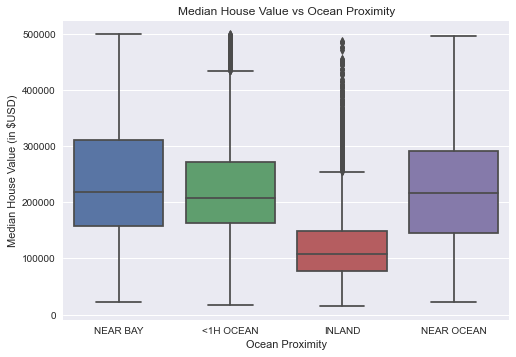

In [61]:
#boxplot
ax = sns.boxplot(data=ch, x="ocean_proximity", y="median_house_value")
plt.title('Median House Value vs Ocean Proximity');
ax.set(xlabel='Ocean Proximity', ylabel='Median House Value (in $USD)')
plt.show()

### Analysis of Data


In [62]:
#Finding the difference in median house value for homes near the bay to near the ocean
bay = ch[ch['ocean_proximity'] == 'NEAR BAY']
ocean = ch[ch['ocean_proximity'] == 'NEAR OCEAN']
bay['median_house_value'].mean() - ocean['median_house_value'].mean()

9552.036504094227

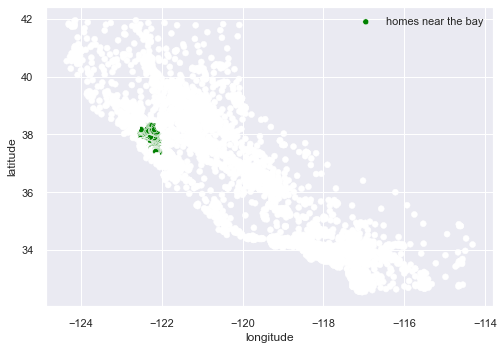

In [63]:
#Plotting latittude and Longitude of homes in "NEAR BAY"

sns.set()
sns.scatterplot(data=ch, 
            x="longitude", y="latitude",
            hue = "ocean_proximity",
            palette = sns.blend_palette(['green','white','white','white'], 4),
            legend = False,
             );
plt.legend(labels = ['homes near the bay'])
plt.show()



### General Trend Apart from the San Francisco Data

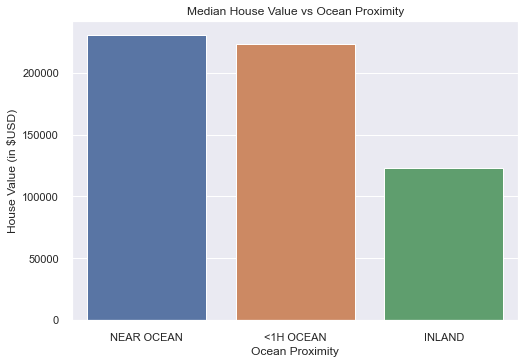

In [64]:
#Putting Near Bay data into near ocaean

ch_new = ch.replace(to_replace ="NEAR BAY",
                 value = "NEAR OCEAN")

ax = sns.barplot(data=ch_new, x="ocean_proximity", y="median_house_value", ci = None)
plt.title('Median House Value vs Ocean Proximity');
ax.set(xlabel='Ocean Proximity', ylabel='House Value (in $USD)')
plt.show()

In [65]:
#Finding difference in average housing price for inland homes compared to near ocean homes
inland = ch[ch['ocean_proximity'] == 'INLAND']
near_ocean = ch[ch['ocean_proximity'] == 'NEAR OCEAN']
near_ocean['median_house_value'].mean()-inland['median_house_value'].mean()

103068.49940081652

In [66]:
#Finding difference in average housing price for <1H ocean homes compared to inland homes
inland = ch[ch['ocean_proximity'] == 'INLAND']
H1 = ch[ch['ocean_proximity'] == '<1H OCEAN']
H1['median_house_value'].mean()-inland['median_house_value'].mean()

100547.64445125764

### Why are housing prices closer to the ocean more expensive?


### Possible Demand Factors

#### Population


In [67]:
#Counting the total population for homes in different areas
inland = ch[ch['ocean_proximity'] == 'INLAND']
near_ocean = ch[ch['ocean_proximity'] == 'NEAR OCEAN']
bay = ch[ch['ocean_proximity'] == 'NEAR BAY']
close_ocean = ch[ch['ocean_proximity'] == '<1H OCEAN']

print("the number of people surveyed which were inland was..." , inland['population'].sum())
print("the number of people surveyed which were near the ocean was...", near_ocean['population'].sum())
print("the number of people surveyed which were less than one hour from the ocean was...", close_ocean['population'].sum())
print("the number of people surveyed which were near the bay was...", bay['population'].sum())


the number of people surveyed which were inland was... 9021531
the number of people surveyed which were near the ocean was... 3317408
the number of people surveyed which were less than one hour from the ocean was... 13097760
the number of people surveyed which were near the bay was... 2581651


#### Median Income


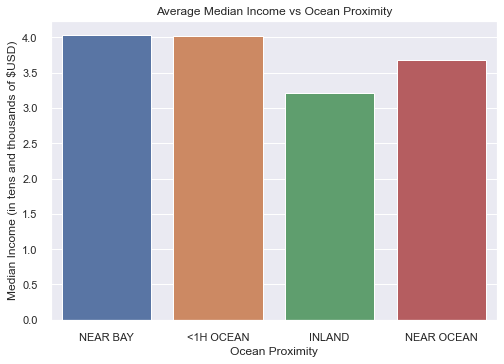

In [30]:
#Graphing the average income for people in different areas
ax = sns.barplot(data=ch, x="ocean_proximity", y="median_income", ci = None)
plt.title('Average Median Income vs Ocean Proximity');
ax.set(xlabel='Ocean Proximity', ylabel='Median Income (in tens and thousands of $USD)')
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [69]:
#Regression model of median house value with respect to ocean proximity and population
ch_new = pd.get_dummies(data = ch, columns = ["ocean_proximity"], drop_first = True)

X = ch_new[["ocean_proximity_INLAND", 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN','population']]
Y = ch_new['median_house_value'] 

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model
training_score = linear.score(X_train,Y_train)

# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear = r2_score(Y_test,preds_linear)

print("Intercept is",np.round(linear.intercept_,2))
print("Coefficients are",np.round(linear.coef_, 2))

Intercept is 223689.99
Coefficients are [-1.0086063e+05  1.0865640e+04  2.6527500e+03 -2.0000000e-02]


In [70]:
#Training and Testing Scores for population and ocean proximity to median house value
print("The training score is", np.round(training_score,2))
print("Testing score is",np.round(rsquared_linear, 2))

The training score is 0.25
Testing score is 0.24


In [71]:
#Regression model of median house value with respect to ocean proximity and median income
ch_new = pd.get_dummies(data = ch, columns = ["ocean_proximity"], drop_first = True)

X = ch_new[["ocean_proximity_INLAND", 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN','median_income']]
Y = ch_new['median_house_value'] 

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model
training_score = linear.score(X_train,Y_train)

# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear = r2_score(Y_test,preds_linear)

print("Intercept is",np.round(linear.intercept_,2))
print("Coefficients are",np.round(linear.coef_, 2))

Intercept is 84779.99
Coefficients are [-73086.65  14112.78  14464.05  34860.46]


In [72]:
#Training and Testing Scores for median house income and ocean proximity to median house value
print("The training score is", np.round(training_score,2))
print("Testing score is",np.round(rsquared_linear, 2))

The training score is 0.55
Testing score is 0.57
